In [ ]:
!sudo pip3 install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
!python -m spacy download es_core_news_lg

2022-08-21 10:33:57.814976: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 568.0 MB 7.9 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


# Contenido

- SVM + spacy (sin preprocesado) 
- SVM + spacy + RandomOverSampler
- SVM + spacy + SMOTE
- SVM + TF_IDF + RandomOverSampler
- SVM + TF_IDF + SMOTE

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

import spacy
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
# Load the Drive helper and mount

drive.mount('/content/drive')
sst_home='drive/My Drive/TFM/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
data_a = pd.read_csv(sst_home+"Data/new_parmex_train.csv") # 7382
data_a = data_a.dropna()

data_b = pd.read_csv(sst_home+"Data/translated_train.tsv", sep='\t') # 49129
data_b = data_b.dropna()
data_b = data_b.reset_index(drop=True)
data_b = data_b.rename(columns={'label': 'Label', 'sentence1': 'Text1', 'sentence2': 'Text2'})

df_pos = data_b[data_b["Label"] == 1].sample(10000, random_state=1)


print(len(data_a))
print(len(df_pos))

7382
10000


In [ ]:
paw_mex_data = pd.concat([
    data_a, 
    df_pos]).reset_index(drop=True)

paw_mex_data = paw_mex_data.sample(
    frac=1,
    random_state=1).reset_index(drop=True)

print(paw_mex_data.columns)
print(paw_mex_data.index)

Index(['id', 'Text1', 'Text2', 'Label'], dtype='object')
RangeIndex(start=0, stop=17382, step=1)


17382
Positivos = 11282
Negativos = 6100
----------------------------


([<matplotlib.patches.Wedge at 0x7fb1dc294bd0>,
 [Text(0.49649995100868205, 0.9815741432252464, 'Negative'),
  Text(-0.4964998591070757, -0.9815741897109225, 'Positive')])

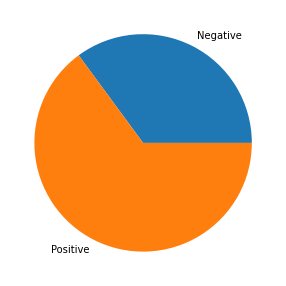

In [ ]:
print(len(paw_mex_data))

print("Positivos =", len(paw_mex_data[paw_mex_data["Label"] == 1]))
print("Negativos =", len(paw_mex_data[paw_mex_data["Label"] == 0]))
print("----------------------------")

fig = plt.figure(figsize =(5, 5))
plot_data = [len(paw_mex_data[paw_mex_data["Label"] == 0]), len(paw_mex_data[paw_mex_data["Label"] == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [8]:
7382 * 0.8 

5905.6

In [9]:
7382 - 5905

1477

In [11]:
49129 - 9826

39303

TOTAL: 7382
Positivos = 1282
Negativos = 6100
----------------------------


([<matplotlib.patches.Wedge at 0x7fc71c8c4610>,
 [Text(-0.9403051753876964, 0.5708118579173996, 'Negative'),
  Text(0.940305121944429, -0.5708119459551217, 'Positive')])

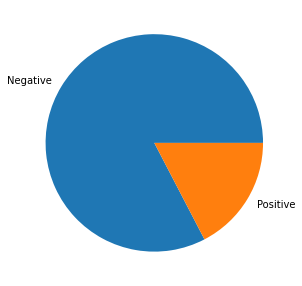

In [ ]:
data = pd.read_csv(sst_home+"Data/new_parmex_train.csv") # 7382
data = data.dropna()

text_1_df = data["Text1"]
text_2_df = data["Text2"]
label_df = data["Label"]

print(f"TOTAL: {len(text_1_df)}")
print("Positivos =", len(data[data["Label"] == 1]))
print("Negativos =", len(data[data["Label"] == 0]))
print("----------------------------")

fig = plt.figure(figsize =(5, 5))
plot_data = [len(data[data["Label"] == 0]), len(data[data["Label"] == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

TOTAL: 49129
Positivos = 21684
Negativos = 27445
----------------------------


([<matplotlib.patches.Wedge at 0x7f3c5ce33b90>,
 [Text(-0.2014716521842303, 1.0813922384436447, 'Negative'),
  Text(0.20147165218422994, -1.081392238443645, 'Positive')])

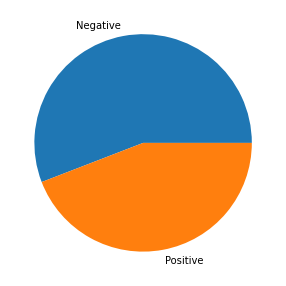

In [ ]:
paw_data = pd.read_csv(sst_home+"Data/translated_train.tsv", sep='\t') # 49129
paw_data = paw_data.dropna()
text_1_df = paw_data["sentence1"]
text_2_df = paw_data["sentence2"]
label_df = paw_data["label"]

print(f"TOTAL: {len(text_1_df)}")
print("Positivos =", len(paw_data[paw_data["label"] == 1]))
print("Negativos =", len(paw_data[paw_data["label"] == 0]))
print("----------------------------")

fig = plt.figure(figsize =(5, 5))
plot_data = [len(paw_data[paw_data["label"] == 0]), len(paw_data[paw_data["label"] == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

TOTAL: 2000
Positivos = 907
Negativos = 1093
----------------------------


([<matplotlib.patches.Wedge at 0x7f12920a6cd0>,
 [Text(-0.16012162238289038, 1.0882835411993839, 'Negative'),
  Text(0.16012172427534846, -1.0882835262077108, 'Positive')])

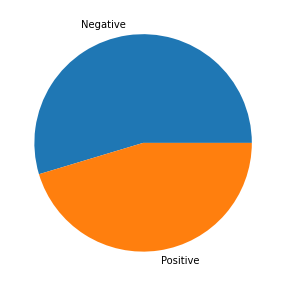

In [ ]:
data = pd.read_csv(sst_home+"Data/test_2k.tsv", sep='\t') # 2000
data = data.dropna()

text_1_df = data["sentence1"]
text_2_df = data["sentence2"]
label_df = data["label"]

print(f"TOTAL: {len(text_1_df)}")
print("Positivos =", len(data[data["label"] == 1]))
print("Negativos =", len(data[data["label"] == 0]))
print("----------------------------")

fig = plt.figure(figsize =(5, 5))
plot_data = [len(data[data["label"] == 0]), len(data[data["label"] == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [ ]:
# PAR-MEX
ask = []
for s in data["Text2"]:
  ask.append(len(s.split(" ")))

print(len(ask))
print("MAX:", np.max(ask))
print("MIN:", np.min(ask))
print("AVG:", np.average(ask))
print("80%:", np.percentile(ask, 80))

#par_df = pd.DataFrame(ask)
#par_df.hist()

7382
MAX: 62
MIN: 7
AVG: 23.758195610945542
80%: 29.0


In [10]:
58511-9826

48685

In [ ]:
ask = []
for s in paw_data["sentence1"]:
  ask.append(len(s.split(" ")))

print(len(ask))
print("MAX:", np.max(ask))
print("MIN:", np.min(ask))
print("AVG:", np.average(ask))
print("80%:", np.percentile(ask, 80))

#paw_df = pd.DataFrame(ask)
#paw_df.hist()

49129
MAX: 42
MIN: 3
AVG: 20.29060229192534
80%: 25.0


17382
MAX: 61
MIN: 4
AVG: 21.72074559889541
95%: 27.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1dbbf9ad0>]],
      dtype=object)

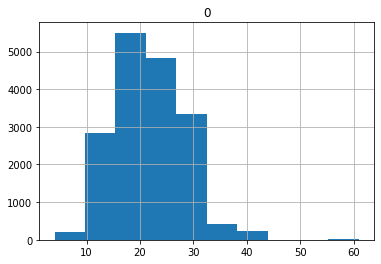

In [ ]:
ask = []
for s in paw_mex_data["Text1"]:
  ask.append(len(s.split(" ")))

print(len(ask))
print("MAX:", np.max(ask))
print("MIN:", np.min(ask))
print("AVG:", np.average(ask))
print("95%:", np.percentile(ask, 80))

paw_mex_df = pd.DataFrame(ask)
paw_mex_df.hist()

In [ ]:
df_comb = pd.DataFrame()
df_comb["Text"] = data_b["Text1"] + " " + data_b["Text2"]
df_comb.head()

,Text
0,"En París, en octubre de 1560, se reunió en sec..."
1,La temporada de la NBA de 1975: 76 fue la 30ª ...
2,"También hay discusiones específicas, debates d..."
3,Cuando se pueden mantener tasas de flujo compa...
4,Es la sede del distrito de Zerendi en la regió...


In [4]:
df_comb = pd.DataFrame()
df_comb["Text"] = data_a["Text1"] + " " + data_a["Text2"]
df_comb.head()

,Text
0,"su nombre proviene de los persas, los cuales e..."
1,"la congelación con deshidratación, uno de los ..."
2,"la empresa de catering caterers bubble, de lon..."
3,el sous vide es un método de cocción que manti...
4,el cuidado de la piel también es un factor a t...


In [5]:
nlp = spacy.load("es_core_news_lg")

In [6]:
tokens=[]
for text in df_comb["Text"]: 
    tok = nlp(text)
    tokens.append(tok.vector)

In [7]:
print(len(tokens), len(data_a["Label"]))

7382 7382


In [8]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 1. SVM + spacy sin balancear

In [ ]:
paw_mex_data = paw_mex_data.sample(frac=1).reset_index(drop=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(tokens, data_a["Label"], test_size=0.2, random_state=42)

In [ ]:
# Prueba con train de pawx y test de parmex
par_X_train, par_X_test, par_y_train, par_y_test = train_test_split(tokens, data_a["Label"], test_size=0.2, random_state=42)

In [ ]:
pos = 0
neg = 0
for y in y_train:
  if y == 1:
    pos+=1
  else:
    neg+=1

print(pos, neg, len(y_train))

9072 4833 13905


In [ ]:

print(f"TOTAL: {len(text_1_df)}")
print("Positivos =", len(y_train[y_train["label"] == 1]))
print("Negativos =", len(y_train[y_train["label"] == 0]))
print("----------------------------")

fig = plt.figure(figsize =(5, 5))
plot_data = [len(data[data["label"] == 0]), len(data[data["label"] == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [ ]:
pos = 0
neg = 0

for y in y_train:
  if y == 1:
    pos += 1
  else:
    neg += 1

print(pos, neg)

9072 4833


# SETUP NUEVO

In [ ]:
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1267
           1       1.00      0.92      0.96      2210

    accuracy                           0.95      3477
   macro avg       0.94      0.96      0.95      3477
weighted avg       0.95      0.95      0.95      3477



# SETUP ANTIGUO (58K PARMEX + PAWX)

In [ ]:
# PAR-MEX
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1210
           1       0.94      0.17      0.29       267

    accuracy                           0.85      1477
   macro avg       0.89      0.58      0.60      1477
weighted avg       0.86      0.85      0.80      1477



In [ ]:
#PAW-X
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.97      0.72      5461
           1       0.74      0.10      0.18      4365

    accuracy                           0.59      9826
   macro avg       0.66      0.54      0.45      9826
weighted avg       0.65      0.59      0.48      9826



In [ ]:
#PAW-X train par-mex test
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_train,y_train)
predictions = pipeline.predict(par_X_test)

print( classification_report(par_y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1210
           1       1.00      0.01      0.02       267

    accuracy                           0.82      1477
   macro avg       0.91      0.51      0.46      1477
weighted avg       0.85      0.82      0.74      1477



Text(0.5, 0, 'predicted label')

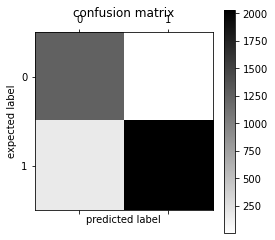

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix(y_test, predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

CPU times: user 27.1 s, sys: 478 ms, total: 27.6 s
Wall time: 2min 27s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

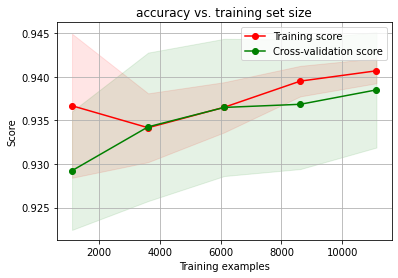

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_train,y_train, cv=5)

# 2. SVC + spacy + RandomOverSampler

Se aplica el oversampling al batch de entrenamiento, para no sesgar el test.

[(0, 4890), (1, 4890)]
Negatives =  4890
Positives =  4890
--------------------------


([<matplotlib.patches.Wedge at 0x7f854d0aaf10>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-2.0206672185931328e-16, -1.1, 'Positive')])

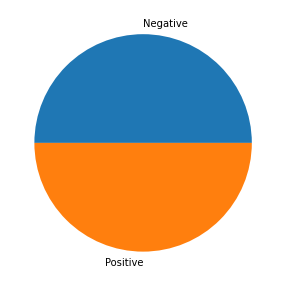

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
print("Negatives = ", len(y_resampled[y_resampled == 0]))
print("Positives = ", len(y_resampled[y_resampled == 1]))
print("--------------------------")
fig = plt.figure(figsize =(5, 5))
plot_data = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

# PAW_MEX

In [ ]:
len(data_b)

49129

In [ ]:
len(y_test)

9826

In [ ]:
# PAW-X
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_resampled,y_resampled)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.68      0.62      5461
           1       0.49      0.38      0.43      4365

    accuracy                           0.55      9826
   macro avg       0.53      0.53      0.53      9826
weighted avg       0.54      0.55      0.54      9826



In [ ]:
# PAR-MEX
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_resampled,y_resampled)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1210
           1       0.57      0.78      0.66       267

    accuracy                           0.85      1477
   macro avg       0.76      0.82      0.78      1477
weighted avg       0.88      0.85      0.86      1477



In [ ]:
# PAW-MEX BUENO 17K
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_resampled,y_resampled)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1267
           1       1.00      0.91      0.95      2210

    accuracy                           0.94      3477
   macro avg       0.93      0.95      0.94      3477
weighted avg       0.95      0.94      0.94      3477



# LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('classifier', LinearSVC(C=0.1, max_iter=5000, dual=False)),
])

pipeline.fit(X_resampled,y_resampled)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1267
           1       1.00      0.90      0.94      2210

    accuracy                           0.93      3477
   macro avg       0.92      0.95      0.93      3477
weighted avg       0.94      0.93      0.93      3477



In [ ]:
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('classifier', LinearSVC(C=0.1, max_iter=5000, dual=False)),
])

pipeline.fit(X_resampled,y_resampled)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      6936
           1       0.45      0.59      0.51      4767

    accuracy                           0.54     11703
   macro avg       0.55      0.55      0.54     11703
weighted avg       0.57      0.54      0.55     11703



Text(0.5, 0, 'predicted label')

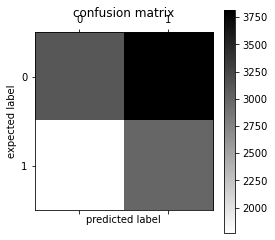

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix(y_test, predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_resampled,y_resampled, cv=5)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


# 3. SVC + spacy + SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

Negatives =  4890
Positives =  4890
--------------------------


([<matplotlib.patches.Wedge at 0x7f47481eb810>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-2.0206672185931328e-16, -1.1, 'Positive')])

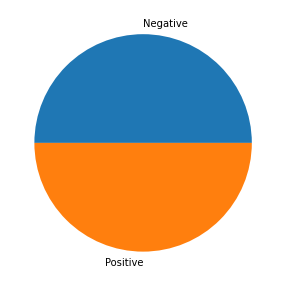

In [11]:
X_res, y_res = sm.fit_resample(X_train, y_train)

print("Negatives = ", len(y_res[y_res == 0]))
print("Positives = ", len(y_res[y_res == 1]))
print("--------------------------")
fig = plt.figure(figsize =(5, 5))
plot_data = [len(y_res[y_res == 0]), len(y_res[y_res == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [ ]:
# PAW-MEX 17K
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_res,y_res)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1267
           1       1.00      0.91      0.95      2210

    accuracy                           0.94      3477
   macro avg       0.93      0.95      0.94      3477
weighted avg       0.95      0.94      0.94      3477



In [ ]:
# PAW-X
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_res,y_res)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.68      0.63      5461
           1       0.49      0.39      0.44      4365

    accuracy                           0.55      9826
   macro avg       0.54      0.53      0.53      9826
weighted avg       0.54      0.55      0.54      9826



In [ ]:
len(X_test)

1477

In [12]:
# PAR-MEX
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_res,y_res)

Pipeline(steps=[('classifier', SVC())])

In [13]:
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1210
           1       0.54      0.75      0.63       267

    accuracy                           0.84      1477
   macro avg       0.74      0.80      0.76      1477
weighted avg       0.87      0.84      0.85      1477



In [ ]:
# PAW-MEX MALO
pipeline = Pipeline([
    ('classifier', SVC()),
])

pipeline.fit(X_res,y_res)
predictions = pipeline.predict(X_test)

print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.63      0.48      0.54      6936
           1       0.44      0.59      0.50      4767

    accuracy                           0.52     11703
   macro avg       0.53      0.53      0.52     11703
weighted avg       0.55      0.52      0.53     11703



Text(0.5, 0, 'predicted label')

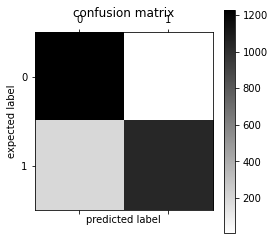

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix(y_test, predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

CPU times: user 4min 23s, sys: 1.43 s, total: 4min 24s
Wall time: 6min 40s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

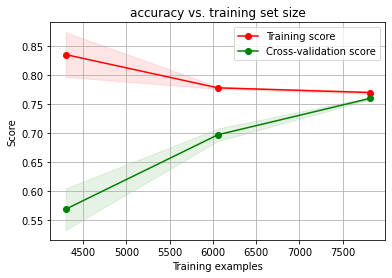

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_res, y_res, cv=5)

# SVC + TF-IDF + SMOTE

In [ ]:
text_1_df = paw_mex_data["Text1"]
text_2_df = paw_mex_data["Text2"]
label_df = paw_mex_data["Label"]

In [33]:
text_1_df = data_b["Text1"]
text_2_df = data_b["Text2"]
label_df = data_b["Label"]

In [34]:
texts = []
i = 0
for text in text_1_df:
  texts.append(text + " " + text_2_df[i])
  i = i+1
print(len(texts)) # 7601 / 49129 / 17382

49129


In [15]:
import scipy

In [ ]:
def cosine_distance_wordembedding(s1, s2):
    """gets two texts, obtains their word embeddings and then returns its cosine distance"""

    cosine = 1 - scipy.spatial.distance.cosine(s1, s2)
    return round((cosine),2)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(texts, label_df, test_size=0.2, random_state=42)

In [19]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stopwords_sp = stopwords.words("spanish")

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re


def cleanText(text):
    text=str(text).lower()
    #tokeniza the text
    tokens=word_tokenize(text)
    #remove the stopwords
    tokens = [word for word in tokens if word not in stopwords_sp]
    #(4) obtain the stems
    tokens = [PorterStemmer().stem(word) for word in tokens]
    #(5) finally, remove words with len <3 and words that contain numbers, puntuaction, ect
    min_length = 3
    p = re.compile('[a-zA-Z]+');
    filtered_tokens=[]
    for token in tokens:
        if len(token)>=min_length and p.match(token):
            filtered_tokens.append(token)
            
    return filtered_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

bow = CountVectorizer(analyzer=cleanText).fit(X_train)
#transform the training set to bow model
bow_train = bow.transform(X_train)
#transform the test set to bow model
bow_test=bow.transform(X_test)

#learn the tf-idf model from the training bow
tfidf_transformer = TfidfTransformer().fit(bow_train)
#transform the training set to tf-idf model
tfidf_train = tfidf_transformer.transform(bow_train)
#transform the test set to tf-idf model
tfidf_test = tfidf_transformer.transform(bow_test)

print('matrices obtained')

matrices obtained


# Tf_Idf + SVC

In [ ]:
# PAW-MEX 17K
from sklearn.pipeline import Pipeline
from sklearn import svm

pipeline = Pipeline([
    #('bow', CountVectorizer(analyzer=cleanText)),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
])
pipeline.fit(tfidf_train, y_train)

predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1267
           1       1.00      0.94      0.97      2210

    accuracy                           0.96      3477
   macro avg       0.95      0.97      0.96      3477
weighted avg       0.96      0.96      0.96      3477



In [37]:
from sklearn.pipeline import Pipeline
from sklearn import svm

pipeline = Pipeline([
    #('bow', CountVectorizer(analyzer=cleanText)),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
])
pipeline.fit(tfidf_train, y_train)

Pipeline(steps=[('classifier', SVC())])

In [23]:
# PAR-MEX
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1210
           1       0.94      0.27      0.42       267

    accuracy                           0.87      1477
   macro avg       0.90      0.63      0.67      1477
weighted avg       0.87      0.87      0.83      1477



In [38]:
# PAW-X
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.82      0.66      5461
           1       0.46      0.19      0.27      4365

    accuracy                           0.54      9826
   macro avg       0.51      0.51      0.47      9826
weighted avg       0.52      0.54      0.49      9826



In [ ]:
predicted = []
i = 0
for tok1 in tfidf_train:
  tok2 = tokens_2[i]
  pred = cosine_distance_wordembedding(tok1, tok2)
  if pred < 0.91:
    predicted.append(0)
  else:
    predicted.append(1)
  i = i+1

In [39]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

Negatives =  21984
Positives =  21984
--------------------------


([<matplotlib.patches.Wedge at 0x7f4742fd6c90>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-2.0206672185931328e-16, -1.1, 'Positive')])

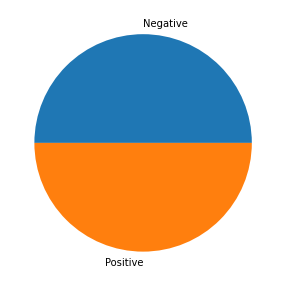

In [40]:
X_res, y_res = sm.fit_resample(tfidf_train, y_train)

print("Negatives = ", len(y_res[y_res == 0]))
print("Positives = ", len(y_res[y_res == 1]))
print("--------------------------")
fig = plt.figure(figsize =(5, 5))
plot_data = [len(y_res[y_res == 0]), len(y_res[y_res == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [26]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re


def cleanText(text):
    text=str(text).lower()
    #tokeniza the text
    tokens=word_tokenize(text)
    filtered_tokens=[]
    for token in tokens:
        filtered_tokens.append(token)
            
    return filtered_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:

from sklearn.pipeline import Pipeline
from sklearn import svm

pipeline = Pipeline([
    #('bow', CountVectorizer(analyzer=cleanText)),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
])
pipeline.fit(X_res,y_res)

Pipeline(steps=[('classifier', SVC())])

In [28]:
# PAR-MEX
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1210
           1       0.91      0.49      0.64       267

    accuracy                           0.90      1477
   macro avg       0.90      0.74      0.79      1477
weighted avg       0.90      0.90      0.89      1477



In [42]:
# PAW-X
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.54      0.74      0.62      5461
           1       0.38      0.20      0.26      4365

    accuracy                           0.50      9826
   macro avg       0.46      0.47      0.44      9826
weighted avg       0.47      0.50      0.46      9826



In [ ]:
# PAW-MEX 17K
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1267
           1       1.00      0.94      0.97      2210

    accuracy                           0.96      3477
   macro avg       0.95      0.97      0.96      3477
weighted avg       0.96      0.96      0.96      3477



Text(0.5, 0, 'predicted label')

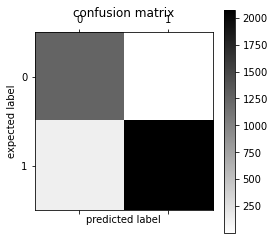

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.matshow(confusion_matrix(y_test, predictions), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 2.51 s, sys: 503 ms, total: 3.02 s
Wall time: 7min 28s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

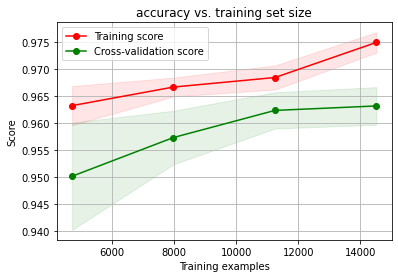

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_res, y_res, cv=5)

# OLD CONFIG 52K

In [ ]:
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65      6936
           1       0.36      0.21      0.27      4767

    accuracy                           0.53     11703
   macro avg       0.47      0.48      0.46     11703
weighted avg       0.49      0.53      0.49     11703



# SVC + TF-IDF + RandomOverSampler

[(0, 4890), (1, 4890)]
Negatives =  4890
Positives =  4890
--------------------------


([<matplotlib.patches.Wedge at 0x7f474826cc90>,
 [Text(6.735557395310444e-17, 1.1, 'Negative'),
  Text(-2.0206672185931328e-16, -1.1, 'Positive')])

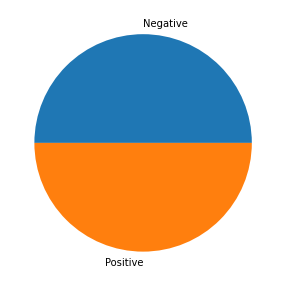

In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(tfidf_train, y_train)
from collections import Counter
print(sorted(Counter(y_resampled).items()))
print("Negatives = ", len(y_resampled[y_resampled == 0]))
print("Positives = ", len(y_resampled[y_resampled == 1]))
print("--------------------------")
fig = plt.figure(figsize =(5, 5))
plot_data = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]
plt.pie(plot_data, labels = ["Negative", "Positive"])

In [30]:
from sklearn.pipeline import Pipeline
from sklearn import svm
pipeline = Pipeline([
    #('bow', CountVectorizer(analyzer=cleanText)),  # strings to token integer counts
    #('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', svm.SVC()),  # train on TF-IDF vectors w/ Support Vector Machine classifier
])
pipeline.fit(X_resampled,y_resampled)

Pipeline(steps=[('classifier', SVC())])

In [31]:
# PAR-MEX
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1210
           1       0.86      0.64      0.73       267

    accuracy                           0.92      1477
   macro avg       0.89      0.81      0.84      1477
weighted avg       0.91      0.92      0.91      1477



In [ ]:
# PAW-X
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.59      0.54      5461
           1       0.32      0.24      0.28      4365

    accuracy                           0.44      9826
   macro avg       0.41      0.42      0.41      9826
weighted avg       0.42      0.44      0.42      9826



In [ ]:
# PAW-MEX 17K
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1267
           1       1.00      0.94      0.97      2210

    accuracy                           0.96      3477
   macro avg       0.95      0.97      0.96      3477
weighted avg       0.96      0.96      0.96      3477



In [ ]:
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1239
           1       0.99      0.88      0.93      1238

    accuracy                           0.94      2477
   macro avg       0.94      0.94      0.94      2477
weighted avg       0.94      0.94      0.94      2477



In [ ]:
predictions = pipeline.predict(tfidf_test)
print( classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53      6936
           1       0.32      0.32      0.32      4767

    accuracy                           0.45     11703
   macro avg       0.43      0.43      0.43     11703
weighted avg       0.45      0.45      0.45     11703



/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 2.67 s, sys: 404 ms, total: 3.07 s
Wall time: 7min 29s


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

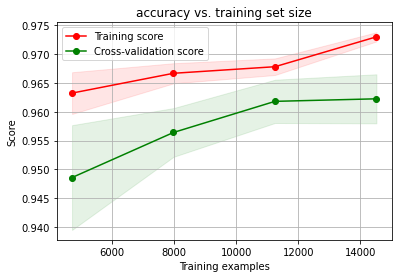

In [ ]:
%time plot_learning_curve(pipeline, "accuracy vs. training set size", X_resampled,y_resampled, cv=5)